# SAM MODEL OUTPUTS VS SHEBA OUTPUTS

In [1]:
# Numpy and xarray are always necessary to read and manage the data
import numpy as np
import xarray as xr
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Hvplot and holoviews are important to plot interactive widgets
import hvplot.xarray
import hvplot.pandas
import holoviews as hv

## * FIGURE N° 1: Sheba Winter Rawisonde Temperature Anomalies & Mean Profile

>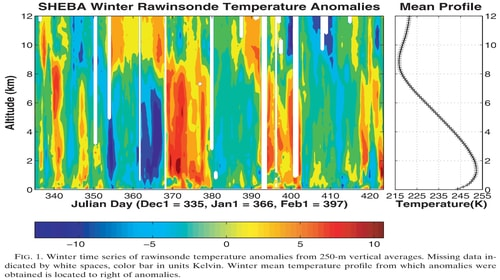

In [2]:
ds_1=xr.open_dataset('./EXP_9/ARTIC_sheba1_20.bin2D_1.nc')
ds_2=xr.open_dataset('./EXP_9/ARTIC_sheba1_20.bin2D_2.nc')

In [3]:
ds_t=ds_1['TABS'].combine_first(ds_2['TABS'])
ds_t.coords['x']=ds_t.coords['x']/1000
ds_t1=ds_t.where(ds_t.time>31,drop=True)
ds_tabs=ds_t1.where(ds_t1.x>501,drop=True)

In [4]:
del(ds_1,ds_2,ds_t,ds_t1)

In [5]:
ds_Tavg=ds_tabs.mean(dim='time')
ds_anom=ds_tabs-ds_Tavg

>Anomalies

In [16]:
anom=ds_anom.hvplot.contourf(x='time',y='z',groupby='x',cmap='jet',padding=0,levels=[-15,-12.5,-10,-7.5,-5,-2.5,0,2.5,5,7.5,10,12.5,15])
anom

:DynamicMap   [x]
   :Polygons   [time,z]   (TABS)

> Mean Profile

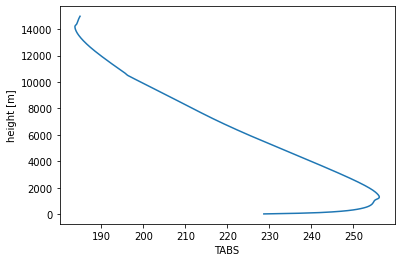

In [7]:
ds_prof=ds_Tavg.mean(dim='x')
ds_prof.plot(y='z')

>## FIGURE N° 2: Sheba Winter 97-98 Hourly NetLW Obs (Surface)

>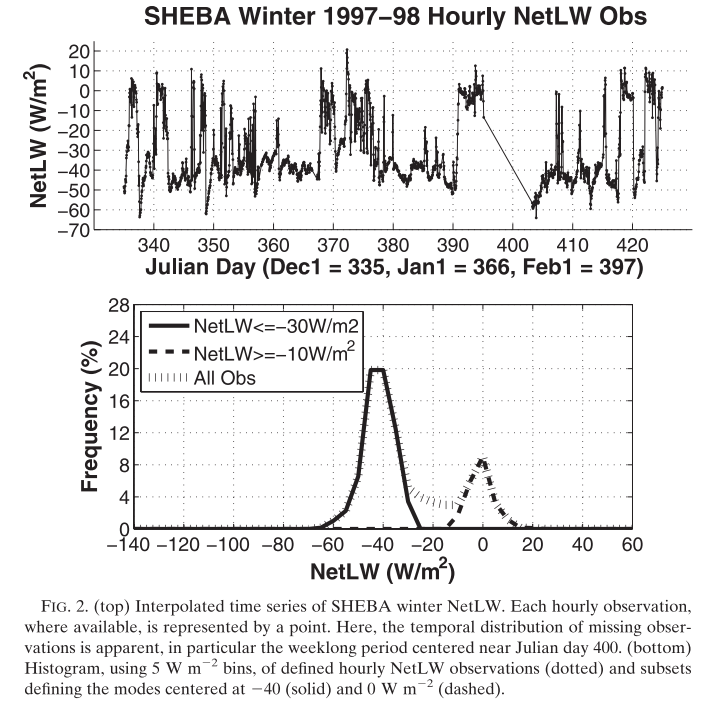

In [8]:
d2_t1=xr.open_dataset('/home/fio/Documents/SAM_CHEYENNE/EXP_9/ARTIC_sheba1_20.2Dbin_1.nc')
d2_t1.coords['x']=d2_t1.coords['x']/1000
d2_t1=d2_t1.where(d2_t1.time>31,drop=True)
d2_z1=d2_t1.where(d2_t1.x>501,drop=True)
del(d2_t1)

> Time Series of NetLW

In [17]:
ts_g1=d2_z1['LWNS'].hvplot(x='time',groupby='x')
ts_g1

:DynamicMap   [x]
   :Curve   [time]   (LWNS)

> Density Graph TOTAL

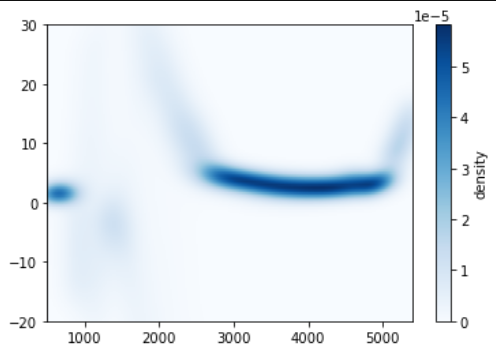

In [18]:
dg_1=d2_z1['LWNS'].hvplot.kde(y='LWNS',label='All',line_width=3,fill_color=None,line_color='green',width=800,groupby='x')
dg_1

:DynamicMap   [x]
   :Distribution   [LWNS]   (Density)

> Density Graph With Conditions

In [11]:
a=d2_z1['LWNS'].where(d2_z1.LWNS>=-10,drop=True)
b=d2_z1['LWNS'].where(d2_z1.LWNS<=-30,drop=True)
c=np.arange(1617,2196,3)

In [12]:
dg_1=d2_z1['LWNS'].sel(x=c).hvplot.kde(y='LWNS',label='All',line_width=3,fill_color=None,line_color='green',width=800,groupby='x',dynamic=False)
dg_2=a.sel(x=c).hvplot.kde(y='LWNS',fill_color=None,label='NLWS>=-10',line_width=5,line_dash='dotted',line_color='red',width=800,alpha=0.5,groupby='x',dynamic=False)
dg_3=b.sel(x=c).hvplot.kde(fill_color=None,line_width=4,label='NLWS<=-30',line_dash='dashed',line_color='blue',y='LWNS',width=800,alpha=0.5,groupby='x',dynamic=False)
dg_1*dg_2*dg_3

:HoloMap   [x]
   :Overlay
      .Distribution.All                                      :Distribution   [LWNS]   (Density)
      .Distribution.NLWS_greater_than_equals_hyphen_minus_10 :Distribution   [LWNS]   (Density)
      .Distribution.NLWS_less_than_equals_hyphen_minus_30    :Distribution   [LWNS]   (Density)

### > EXTRA: Radiative Forcing (NetLW - NetLW Clear Sky)

> *Time Series of (NetLW - NetLW Clear Sky)

In [19]:
ts_2=(d2_z1['LWNS']-d2_z1['LWNSC']).hvplot(x='time',ylabel='W/m2',label='Radiative Forcing (W/m2)',width=700,groupby='x')
ts_2

:DynamicMap   [x]
   :Curve   [time]   (Radiative Forcing (W/m2))

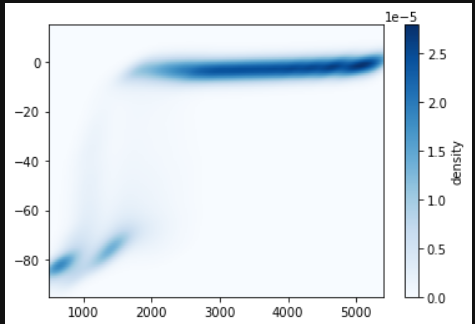

In [20]:
dg_3=(d2_z1['LWNS']-d2_z1['LWNSC']).hvplot.kde(xlabel='days',ylabel='W/m2', label='Radiative Forcing (W/m2)',width=700,groupby='x')
dg_3

:DynamicMap   [x]
   :NdOverlay   [Variable]
      :Distribution   [value]   (Density)